This notebook we will work On KNN


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection  import train_test_split
from sklearn import neighbors
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
SEED = 42

In [2]:
# Read processe file
df = pd.read_csv('../data/processed_balanced_transaction.csv')
df.shape

(21784, 34)

#### Lets separate Level and features, Scaled features

In [3]:
X, y = df.drop(['isFraud'],axis=1), df['isFraud']

Split data into train test

We are spliting data into train and test with ratio 30%. Means 30% test and 70% train data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=SEED)

#### Create a KNN classifier and fit all features

In [5]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [6]:
from sklearn import metrics
target_names = ['Not Fraud', 'Fraud']
print(metrics.classification_report(y_test, y_pred, digits=3, target_names=target_names))

              precision    recall  f1-score   support

   Not Fraud      0.585     0.588     0.587      3276
       Fraud      0.584     0.581     0.583      3260

    accuracy                          0.585      6536
   macro avg      0.585     0.585     0.585      6536
weighted avg      0.585     0.585     0.585      6536



### Converting to standard scale and fit again

In [7]:
from sklearn.preprocessing import StandardScaler
X, y = df.drop(['isFraud'],axis=1), df['isFraud']
# scale the features by standard scaler
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21784 entries, 0 to 21783
Data columns (total 34 columns):
accountNumber                    21784 non-null int64
acqCountry                       21784 non-null int64
availableMoney                   21784 non-null float64
cardCVV                          21784 non-null int64
cardLast4Digits                  21784 non-null int64
cardPresent                      21784 non-null int64
creditLimit                      21784 non-null float64
currentBalance                   21784 non-null float64
customerId                       21784 non-null int64
enteredCVV                       21784 non-null int64
expirationDateKeyInMatch         21784 non-null int64
isFraud                          21784 non-null int64
merchantCategoryCode             21784 non-null int64
merchantCountryCode              21784 non-null int64
merchantName                     21784 non-null int64
posConditionCode                 21784 non-null int64
posEntryMode         

In [9]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [10]:
print(metrics.classification_report(y_test, y_pred, digits=3, target_names=target_names))

              precision    recall  f1-score   support

   Not Fraud      0.585     0.588     0.587      3276
       Fraud      0.584     0.581     0.583      3260

    accuracy                          0.585      6536
   macro avg      0.585     0.585     0.585      6536
weighted avg      0.585     0.585     0.585      6536



#### Cross validation

we are going to apply k-fold cross-validation.

it will split the original data set into k subsets and use one of the subsets as the testing set and the remaining as the training sets. This process iterated k times until every subset have been used as the testing set. Since 10-fold cross-validation is the most popular one, we are going to use that on

Average score: 0.589


Text(0.5,1,'Average score: 0.5892579493137128')

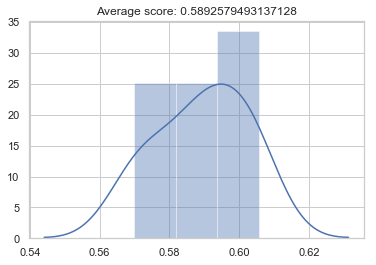

In [11]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
cv_scores = cross_val_score(knn, X_train, y_train, cv=10)
print('Average score: {}'.format(round(np.mean(cv_scores),3)))
sns.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

#### Parameter Tuning

In classification technique, there are some parameters that can be tuned to optimize the classification. 
In DecessionTreeClassifier we can tune 

- n_neighbors
- leaf_size
- algorithm
- n_jobs

Grid Search explores a range of parameters and finds the best combination of parameters. Then repeat the process several times until the best parameters are discovered. 
lets use grid search to get best params



In [12]:
#Hyper Parameters Set
params = {'n_neighbors':[5,6],
          'leaf_size':[2,3],
          }

#Use GridSearch
grid_search = GridSearchCV(KNeighborsClassifier(), params, cv=10, n_jobs=-1)
#Fit the model
grid_search.fit(X_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

best_KNN = grid_search.best_estimator_

Best score: 0.5965371541672044
Best parameters: {'leaf_size': 2, 'n_neighbors': 6}


In [13]:
best_KNN.fit(X_train, y_train)
y_pred_knn = best_KNN.predict(X_test)

In [14]:
from sklearn import metrics
target_names = ['Not Fraud', 'Fraud']
print(metrics.classification_report(y_test, y_pred_knn, digits=3, target_names=target_names))

              precision    recall  f1-score   support

   Not Fraud      0.571     0.711     0.633      3276
       Fraud      0.615     0.463     0.528      3260

    accuracy                          0.587      6536
   macro avg      0.593     0.587     0.581      6536
weighted avg      0.593     0.587     0.581      6536



### confusion_matrix for KNN Model

In [15]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [16]:
y_test00=y_test.replace({0:'Not Fraud',1:'Fraud'})

In [17]:
y_pred_knn_cv00=pd.DataFrame(y_pred_knn).replace({0:'Not Fraud',1:'Fraud'})

Confusion matrix, without normalization
[[2330  946]
 [1751 1509]]


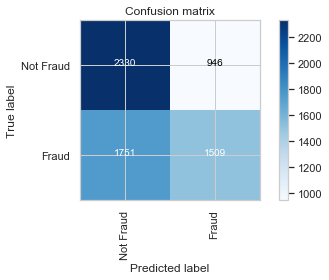

In [18]:
cnf_matrix = metrics.confusion_matrix(y_test00, y_pred_knn_cv00,labels=target_names)
np.set_printoptions(precision=2)


plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')

### Save best model

In [19]:
import pickle

lookup ={
    1 : 'Fraud', 0:'Not Fraud'
}

pickle.dump(best_KNN, open('../saved_models/knn_model.pkl','wb'))
model = pickle.load(open('../saved_models/knn_model.pkl','rb'))
